# **Pandas**

## Indexado

In [54]:
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

In [11]:
dict_1 = {
    "Mes":['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio' ,'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
    "Ventas":[30500, 35600, 28300, 33900, 22002, 32003, 54000, 35000, 11254, 65871, 27000, 39741],
    "Gastos":[22000, 23400, 18100, 20700, 19154, 21367, 27544, 19871, 24150, 23574, 30000, 24000]
}

In [12]:
df_1 = pd.DataFrame(dict_1)
df_1

,Mes,Ventas,Gastos
0,Enero,30500,22000
1,Febrero,35600,23400
2,Marzo,28300,18100
3,Abril,33900,20700
4,Mayo,22002,19154
5,Junio,32003,21367
6,Julio,54000,27544
7,Agosto,35000,19871
8,Septiembre,11254,24150
9,Octubre,65871,23574


## **Accediendo a los datos de un DataFrame**

## \**Observación**: podríamos decir que el estándar base en Python para acceder a los datos por índices es [fila][columna]

In [13]:
## Vamos a ver la forma de acceder datos en Python

a = [[9, 8, 7],[6,5,4],[3,2,1]]
arr_1 = np.array(a)
print(arr_1)

[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [16]:
print(type(arr_1))

<class 'numpy.ndarray'>


In [17]:
## Vamos a direccionar el 4
## Primero ponemos la coordenada de la fila y luego la coordenada de la columna

print(arr_1[1][2])

4


In [18]:
## ¿Qué número se encuentra en esta posición?

print(a[2][0])

3


#### ¿Qué pasa si intentamos acceder a un elemento del DataFrame usando esta forma de indexado?

In [19]:
## Elemento 0,0 del DataFrame

df_1[0][0]

KeyError: 0

#### Para direccionar un elemento dentro de un DataFrame ponemos primero el índice de la columna (nombre de la columna) y luego el índice de la fila (nombre de la fila)

In [20]:
## Vamnos a leer el elemento con índice 9 de la columna mes

df_1['Mes'][9]

'Octubre'

## Leer toda una columna


#### Para obtener los elementos de una columna usamos el nombre de la columna

In [21]:
## Podemos usar el nommbre de la columna dentro de los corchetes

a = df_1['Ventas']
print(a)
print(type(a))

0     30500
1     35600
2     28300
3     33900
4     22002
5     32003
6     54000
7     35000
8     11254
9     65871
10    27000
11    39741
Name: Ventas, dtype: int64
<class 'pandas.core.series.Series'>


In [22]:
## También podemos usar el nombre de la columna después del punto

v = df_1.Ventas
print(v)
print(type(v))

0     30500
1     35600
2     28300
3     33900
4     22002
5     32003
6     54000
7     35000
8     11254
9     65871
10    27000
11    39741
Name: Ventas, dtype: int64
<class 'pandas.core.series.Series'>


## Ejercicio

Realizar una gráfica que muestre las ventas y gastos en cada uno de los meses.

In [23]:
## Paso 1: obtenemos los valores de las ventas. Estos valores serán ubicados en el eje Y de la gráfica.

ventas = df_1.Ventas.values
print(ventas)
print(type(ventas))

[30500 35600 28300 33900 22002 32003 54000 35000 11254 65871 27000 39741]
<class 'numpy.ndarray'>


In [24]:
## Paso 2: obtenemos los valores de los gastos. Estos valores serán ubicados en el eje Y de la gráfica.

gastos = df_1['Gastos'].values
print(gastos)
print(type(gastos))

[22000 23400 18100 20700 19154 21367 27544 19871 24150 23574 30000 24000]
<class 'numpy.ndarray'>


In [25]:
## Paso 3: obtenemos los valores de los meses. Estos valores serán obtenidos en el eje X de la gráfica.

meses = df_1['Mes'].values
print(meses)
print(type(meses))

['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']
<class 'numpy.ndarray'>


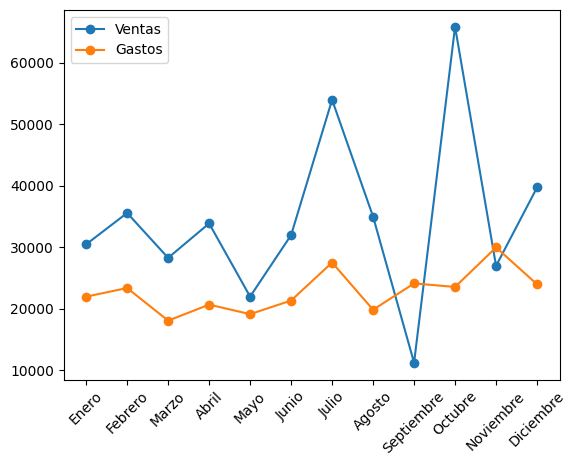

In [26]:
## Paso 4: seleccionamos el tipo de gráfica y la construimos utilizando Matplotlib

plt.plot(meses,ventas, marker='o', label='Ventas')
plt.plot(meses,gastos, marker='o', label='Gastos')
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.show()

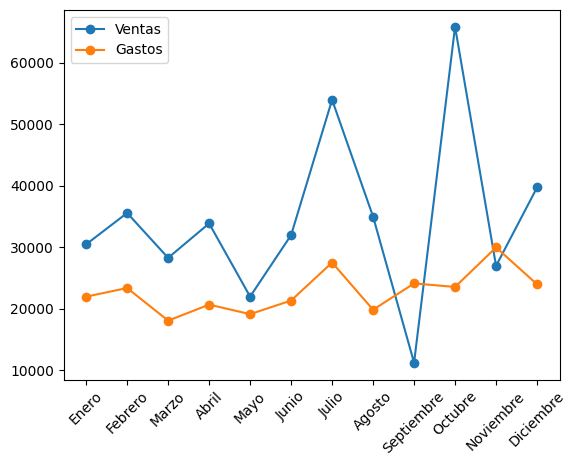

In [27]:
## Vamos a intentar hacer la misma gráfica, pero usando directamente las columnas del DataFrame

plt.plot(df_1['Mes'],df_1['Ventas'], marker='o', label='Ventas')
plt.plot(df_1['Mes'],df_1['Gastos'], marker='o', label='Gastos')
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.show()

## Ejercicio

Graficar el balance mensual (ventas-gasto)

In [28]:
## Paso 1: Calcular los valores del balance mensual

ventas = df_1.Ventas.values
gastos = df_1['Gastos'].values
balance = ventas - gastos

print(balance)

[  8500  12200  10200  13200   2848  10636  26456  15129 -12896  42297
  -3000  15741]


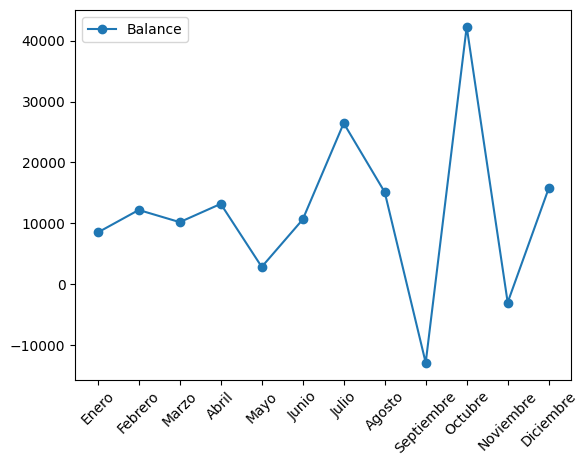

In [29]:
## Paso 2: seleccionamos el tipo de gráfica y la construimos utilizando Matplotlib

plt.plot(meses,balance, marker='o', label='Balance')
plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.show()

#### También podemos crear otra columna en el DataFrame para guardar la información del balance mensual

In [30]:
## Hacemos una copia profunda del DataFrame para no afectar al original

df_2 = df_1.copy()

In [31]:
df_2['Balance'] = balance
df_2

,Mes,Ventas,Gastos,Balance
0,Enero,30500,22000,8500
1,Febrero,35600,23400,12200
2,Marzo,28300,18100,10200
3,Abril,33900,20700,13200
4,Mayo,22002,19154,2848
5,Junio,32003,21367,10636
6,Julio,54000,27544,26456
7,Agosto,35000,19871,15129
8,Septiembre,11254,24150,-12896
9,Octubre,65871,23574,42297


In [32]:
total_ventas = df_2.Ventas.sum()
print(f"El total de ventas en el año fue {total_ventas}")

El total de ventas en el año fue 415171


In [33]:
total_gastos = df_2['Gastos'].sum()
print(f"El total de gastos en el año fue {total_gastos}")

El total de gastos en el año fue 273860


## Acceso a los datos usando loc y iloc

Otra forma de acceder a los datos es a través de los métodos indexación que Pandas nos provee, entre estos encontramos dos:
+ **iloc**, obtenemos los datos a partir de su posición numérica.
+ **loc**, obtenemos los datos con los identificadores.

Ambos métodos utilizan una convención de [fila, columna].

#### **iloc**

In [34]:
df_1

,Mes,Ventas,Gastos
0,Enero,30500,22000
1,Febrero,35600,23400
2,Marzo,28300,18100
3,Abril,33900,20700
4,Mayo,22002,19154
5,Junio,32003,21367
6,Julio,54000,27544
7,Agosto,35000,19871
8,Septiembre,11254,24150
9,Octubre,65871,23574


In [35]:
## Podemos leer toda una fila

b = df_1.iloc[10]
print(b)
print(type(b))

Mes       Noviembre
Ventas        27000
Gastos        30000
Name: 10, dtype: object
<class 'pandas.core.series.Series'>


In [36]:
## Podemos obtener un elemento individual

c = df_1.iloc[10,2]
print(c)
print(type(c))

30000
<class 'numpy.int64'>


In [37]:
## Podemos leer varias columnas

c = df_1.iloc[0:6,:]
print(c)
print(type(c))

       Mes  Ventas  Gastos
0    Enero   30500   22000
1  Febrero   35600   23400
2    Marzo   28300   18100
3    Abril   33900   20700
4     Mayo   22002   19154
5    Junio   32003   21367
<class 'pandas.core.frame.DataFrame'>


In [38]:
## Podemos leer varias filas de una sola columna

c = df_1.iloc[0:6,2]
print(c)
print(type(c))

0    22000
1    23400
2    18100
3    20700
4    19154
5    21367
Name: Gastos, dtype: int64
<class 'pandas.core.series.Series'>


In [39]:
## Podemos leer una porción del DataFrame

d = df_1.iloc[0:3,0:2]
print(d)
print(type(d))

       Mes  Ventas
0    Enero   30500
1  Febrero   35600
2    Marzo   28300
<class 'pandas.core.frame.DataFrame'>


In [40]:
e = df_1.iloc[1,1]
print(e)
print(type(e))

35600
<class 'numpy.int64'>


#### Vamos a cambiar el índice en el DataFrame df_2

In [41]:
## Con el método set_index podemos cambiar los valores de los índices del DataFrame.
## Podemos elegir una columna cuyos valores sean únicos y representatidos dentro del conjunto de datos

df_2.set_index(keys=['Mes'], drop=True, inplace=True)

df_2

,Ventas,Gastos,Balance
Mes,,,
Enero,30500,22000,8500
Febrero,35600,23400,12200
Marzo,28300,18100,10200
Abril,33900,20700,13200
Mayo,22002,19154,2848
Junio,32003,21367,10636
Julio,54000,27544,26456
Agosto,35000,19871,15129
Septiembre,11254,24150,-12896


In [42]:
df_2.iloc[1]

Ventas     35600
Gastos     23400
Balance    12200
Name: Febrero, dtype: int64

#### **loc**

In [43]:
df_1.index

RangeIndex(start=0, stop=12, step=1)

In [44]:
## Para direccionar los elementos usamos los nombres de los índices

f = df_1.loc[6,'Ventas']
print(f)
print(type(f))

54000
<class 'numpy.int64'>


In [45]:
g = df_1.loc[:,['Mes','Ventas']]
print(g)
print(type(g))

           Mes  Ventas
0        Enero   30500
1      Febrero   35600
2        Marzo   28300
3        Abril   33900
4         Mayo   22002
5        Junio   32003
6        Julio   54000
7       Agosto   35000
8   Septiembre   11254
9      Octubre   65871
10   Noviembre   27000
11   Diciembre   39741
<class 'pandas.core.frame.DataFrame'>


Podemos crear filtros y usarlos con loc

In [46]:
df_1.Mes == 'Febrero'

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
Name: Mes, dtype: bool

In [47]:
h = df_1.loc[df_1.Mes == 'Febrero']
print(h)
print(type(h))

       Mes  Ventas  Gastos
1  Febrero   35600   23400
<class 'pandas.core.frame.DataFrame'>


#### Aunque los filtros también podemos usarlos directamente sin necesidad de usar loc

In [48]:
j = df_1[df_1['Mes'] == 'Febrero']
print(j)
print(type(j))

       Mes  Ventas  Gastos
1  Febrero   35600   23400
<class 'pandas.core.frame.DataFrame'>


In [49]:
## Los filttros nos permiten seleccionar las filas que cumplen cierta condición

jj = df_1[df_1.Ventas >= 50000]
print(jj)
print(type(jj))

       Mes  Ventas  Gastos
6    Julio   54000   27544
9  Octubre   65871   23574
<class 'pandas.core.frame.DataFrame'>


In [50]:
## Podemos usar varias condiciones dentro del filtro
k = df_1[(df_1.Ventas >= 30000) & (df_1.Ventas <= 50000)]
print(k)
print(type(k))

          Mes  Ventas  Gastos
0       Enero   30500   22000
1     Febrero   35600   23400
3       Abril   33900   20700
5       Junio   32003   21367
7      Agosto   35000   19871
11  Diciembre   39741   24000
<class 'pandas.core.frame.DataFrame'>


## Ejercicio

Utilizando el DataFrame df_2 encuentre los meses dónde el balance fue negativo y utilice tabulate para mostar la información en forma tabular.

Recuerden el uso de tabulate:

print(tabulate(DataFrame, headers = 'keys', tablefmt = 'fancy_grid'))

In [ ]:
import pandas as pd                          
from tabulate import tabulate                

df_2 = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'],
    'Balance': [2000, -1500, 1000, -500, 2500, -100]
})


df_negativo = df_2[df_2['Balance'] < 0]


print(tabulate(df_negativo, headers='keys', tablefmt='fancy_grid')) 

╒════╤═════════╤═══════════╕
│    │ Mes     │   Balance │
╞════╪═════════╪═══════════╡
│  1 │ Febrero │     -1500 │
├────┼─────────┼───────────┤
│  3 │ Abril   │      -500 │
├────┼─────────┼───────────┤
│  5 │ Junio   │      -100 │
╘════╧═════════╧═══════════╛


## Ejercicio 2

Escriba un programa que pida a un usuario el nombre del mes y muestre las ventas, gastos y balance para ese mes.

In [ ]:
import pandas as pd  

df_2 = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril'],
    'Ventas': [3000, 2500, 4000, 3500],
    'Gastos': [1500, 1800, 2200, 2000]
})

df_2['Balance'] = df_2['Ventas'] - df_2['Gastos']

mes_usuario = input("Ingrese el nombre del mes (Ej. Enero): ").capitalize()
#mes_usuario = "Marzo" # para usar en jupyter

resultado = df_2[df_2['Mes'] == mes_usuario]

if resultado.empty:
    print("El mes ingresado no se encuentra en los datos.")
else:
    ventas = resultado.iloc[0]['Ventas']    
    gastos = resultado.iloc[0]['Gastos']    
    balance = resultado.iloc[0]['Balance']  

    print(f"\nDatos para el mes de {mes_usuario}:")
    print(f"Ventas: ${ventas}")
    print(f"Gastos: ${gastos}")
    print(f"Balance: ${balance}")


## Ejercicios 3

Escriba un programa que solicite un valor para el balance y muestre la información para todos los meses cuyo balance es mayor o igual a ese valor.

In [ ]:
import pandas as pd                    
from tabulate import tabulate          

df_2 = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril'],
    'Ventas': [3000, 2500, 4000, 3500],
    'Gastos': [1500, 1800, 2200, 2000]
})

df_2['Balance'] = df_2['Ventas'] - df_2['Gastos']

valor_minimo = float(input("Ingrese el valor mínimo de balance: "))

df_filtrado = df_2[df_2['Balance'] >= valor_minimo]

if df_filtrado.empty:
    print("No hay meses con un balance mayor o igual al valor ingresado.")
else:
    print("\nMeses con balance mayor o igual a", valor_minimo)
    print(tabulate(df_filtrado, headers='keys', tablefmt='fancy_grid'))



Meses con balance mayor o igual a 1000.0
╒════╤═══════╤══════════╤══════════╤═══════════╕
│    │ Mes   │   Ventas │   Gastos │   Balance │
╞════╪═══════╪══════════╪══════════╪═══════════╡
│  0 │ Enero │     3000 │     1500 │      1500 │
├────┼───────┼──────────┼──────────┼───────────┤
│  2 │ Marzo │     4000 │     2200 │      1800 │
├────┼───────┼──────────┼──────────┼───────────┤
│  3 │ Abril │     3500 │     2000 │      1500 │
╘════╧═══════╧══════════╧══════════╧═══════════╛


## Ejercicio 4

Grafique Ventas y Balance vs Mes, pero usando gráficos de barras.

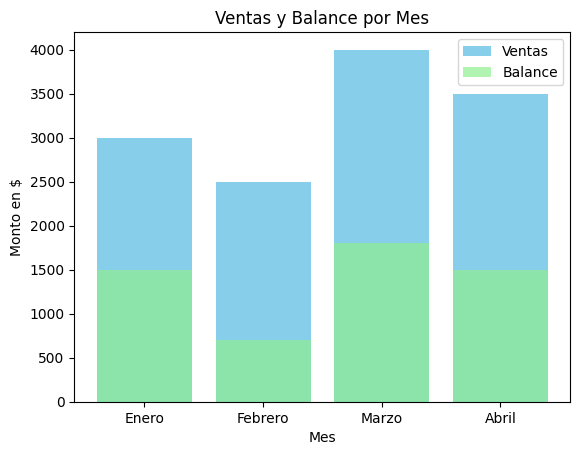

In [ ]:
import pandas as pd                   
import matplotlib.pyplot as plt       

df_2 = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril'],
    'Ventas': [3000, 2500, 4000, 3500],
    'Gastos': [1500, 1800, 2200, 2000]
})

df_2['Balance'] = df_2['Ventas'] - df_2['Gastos']

fig, ax = plt.subplots()  

ax.bar(df_2['Mes'], df_2['Ventas'], label='Ventas', color='skyblue')

ax.bar(df_2['Mes'], df_2['Balance'], label='Balance', color='lightgreen', alpha=0.7)

ax.set_title('Ventas y Balance por Mes')    
ax.set_xlabel('Mes')                        
ax.set_ylabel('Monto en $')                 

ax.legend()

plt.show()

## Ejercicio 5

Muestre toda la información de los meses impares.

In [ ]:
import pandas as pd  

df_2 = pd.DataFrame({
    'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'],
    'Ventas': [3000, 2500, 4000, 3500, 4200, 3900],
    'Gastos': [1500, 1800, 2200, 2000, 2300, 2100]
})

df_2['Balance'] = df_2['Ventas'] - df_2['Gastos']

meses_impares = df_2.iloc[::2]

print("Información de los meses impares:")
print(meses_impares)

Información de los meses impares:
     Mes  Ventas  Gastos  Balance
0  Enero    3000    1500     1500
2  Marzo    4000    2200     1800
4   Mayo    4200    2300     1900


In [2]:
## Solución

meses_impares = [x for x in range(12) if x%2==1]
print(meses_impares)

[1, 3, 5, 7, 9, 11]


In [ ]:
info_meses_impares = df_1.loc[meses_impares,:]
print(info_meses_impares)